In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import numpy as np

from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Vietnam_Food/Images/Train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False)

Found 16661 files belonging to 30 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Vietnam_Food/Images/Validate',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False)

Found 2388 files belonging to 30 classes.


In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

pretrained_model.trainable = True

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(30, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)


print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

history = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=10,

)
# Unfreezed some layers for fine-tuning
pretrained_model.trainable = True
fine_tune_at = 100  # Example: Unfreeze layers starting from layer 100
for layer in pretrained_model.layers[:fine_tune_at]:
    layer.trainable = False

Epoch 1/10
261/261 [==============================] - 677s 3s/step - loss: 0.1587 - binary_accuracy: 0.9675 - false_negatives: 15134.0000 - val_loss: 0.1928 - val_binary_accuracy: 0.9623 - val_false_negatives: 2257.0000
Epoch 2/10
261/261 [==============================] - 443s 2s/step - loss: 0.0732 - binary_accuracy: 0.9785 - false_negatives: 9151.0000 - val_loss: 0.1220 - val_binary_accuracy: 0.9666 - val_false_negatives: 1882.0000
Epoch 3/10
261/261 [==============================] - 435s 2s/step - loss: 0.0483 - binary_accuracy: 0.9865 - false_negatives: 5244.0000 - val_loss: 0.0943 - val_binary_accuracy: 0.9713 - val_false_negatives: 1506.0000
Epoch 4/10
261/261 [==============================] - 430s 2s/step - loss: 0.0320 - binary_accuracy: 0.9924 - false_negatives: 2827.0000 - val_loss: 0.0803 - val_binary_accuracy: 0.9749 - val_false_negatives: 1218.0000
Epoch 5/10
261/261 [==============================] - 424s 2s/step - loss: 0.0208 - binary_accuracy: 0.9962 - false_negativ

In [ ]:
model.save('trained_model_2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

# Assuming you have trained your model and obtained predictions on validation set
# Let's call the predictions 'y_pred' and the ground truth labels 'y_true'

# Obtain predictions on validation set
y_pred = model.predict(validation_set)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Extract ground truth labels
y_true = []
for images, labels in validation_set:
    y_true.extend(tf.argmax(labels, axis=1).numpy())

# Generate classification report
class_names = validation_set.class_names
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:\n", report)

# Generate confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_mat)


38/38 [==============================] - 16s 384ms/step
Classification Report:
                   precision    recall  f1-score   support

        Banh beo       0.02      0.02      0.02        61
    Banh bot loc       0.01      0.01      0.01        68
        Banh can       0.00      0.00      0.00        72
       Banh canh       0.03      0.02      0.02        94
      Banh chung       0.05      0.07      0.05        46
       Banh cuon       0.08      0.08      0.08       108
        Banh duc       0.07      0.05      0.06        66
        Banh gio       0.02      0.02      0.02        63
       Banh khot       0.00      0.00      0.00        78
         Banh mi       0.03      0.03      0.03       112
        Banh pia       0.00      0.00      0.00        44
        Banh tet       0.07      0.05      0.06        66
Banh trang nuong       0.03      0.03      0.03        80
        Banh xeo       0.07      0.06      0.07       116
      Bun bo Hue       0.06      0.07      0.07  

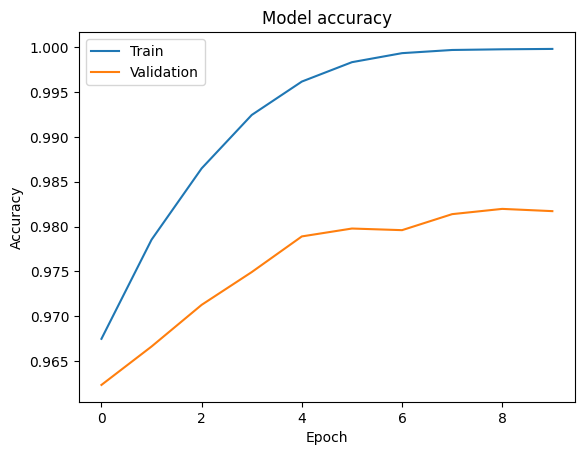

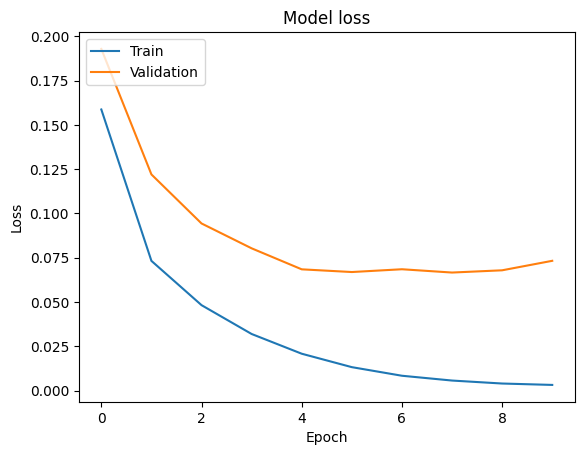

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
